# **KH6006CEM** – **Machine Learning and Related Applications**
# **Mai Elmeligy** – **202101086**

# importing necessary libraries

In [147]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Loading Data

In [148]:
train_dir = '/Users/maielmeligy/Desktop/machinelearning/fer2013/train'
test_dir = '/Users/maielmeligy/Desktop/machinelearning/fer2013/test'


# Prepocessing data

In [149]:
# Data Preprocessing for CNN
datagen = ImageDataGenerator(rescale=1.0/255.0)
# Load training and testing data
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical"
)
test_data = datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical"
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


# Extracting data for SVM

In [150]:
X_train, y_train = train_data[0][0], train_data[0][1].argmax(axis=1)
X_test, y_test = test_data[0][0], test_data[0][1].argmax(axis=1)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Train SVM Classifier

In [151]:
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train_flat, y_train)
svm_predictions = svm_model.predict(X_test_flat)

# Evaluate SVM

In [152]:
print("SVM Confusion Matrix:")
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
print(svm_conf_matrix)
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))

SVM Confusion Matrix:
[[0 0 0 1 0 4 2]
 [0 0 0 1 0 0 0]
 [2 0 0 2 0 1 0]
 [1 0 1 0 0 3 3]
 [0 0 1 2 0 2 1]
 [0 0 0 1 0 1 0]
 [1 0 0 0 0 0 2]]
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         6
           5       0.09      0.50      0.15         2
           6       0.25      0.67      0.36         3

    accuracy                           0.09        32
   macro avg       0.05      0.17      0.07        32
weighted avg       0.03      0.09      0.04        32



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

# Plot SVM Confusion Matrix

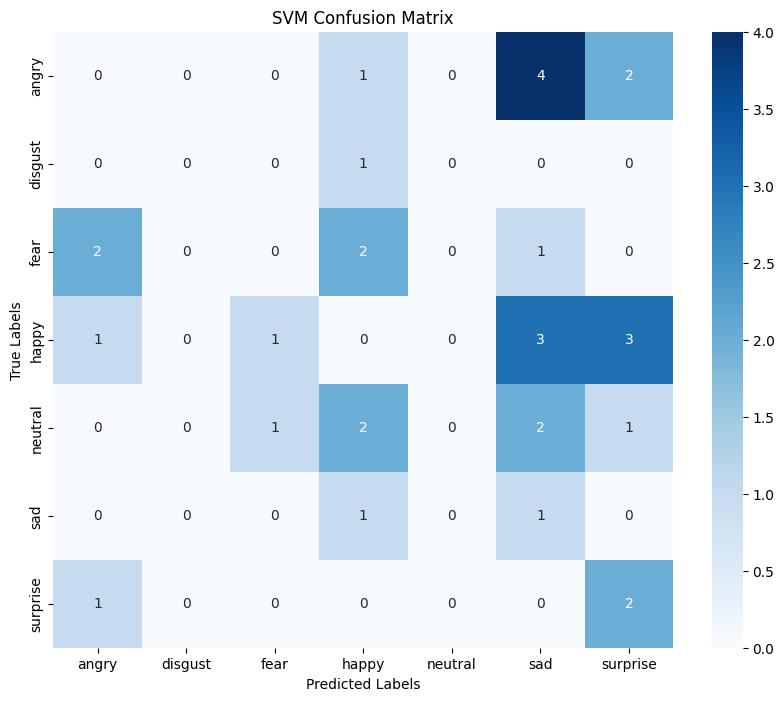

In [153]:
plt.figure(figsize=(10, 8))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_data.class_indices.keys(), yticklabels=train_data.class_indices.keys())
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Hyperparameter tuning using GridSearchCV

In [174]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train_flat, y_train)
print("Best Parameters for SVM:", grid.best_params_)
best_svm_model = grid.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, ke

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


# Build CNN Model

In [154]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_data.class_indices), activation='softmax')
])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile CNN Model

In [155]:
cnn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


# Train CNN Model


In [156]:
history = cnn_model.fit(
    train_data,
    validation_data=test_data,
    epochs=10  
)

Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


898/898 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.2595 - loss: 1.7953 - val_accuracy: 0.4071 - val_loss: 1.5479
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.4005 - loss: 1.5492 - val_accuracy: 0.4567 - val_loss: 1.4333
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.4367 - loss: 1.4493 - val_accuracy: 0.4817 - val_loss: 1.3681
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.4585 - loss: 1.3972 - val_accuracy: 0.4944 - val_loss: 1.3039
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.4842 - loss: 1.3388 - val_accuracy: 0.5077 - val_loss: 1.2855
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.4959 - loss: 1.3163 - val_accuracy: 0.5183 - val_loss: 1.2514
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.5092 - loss: 1.2851 - val_accuracy: 0.5201 - val_loss: 1.2482
Epoch 8/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.5166 - loss: 1.2594 - val_accurac

# Evaluate CNN Model


In [157]:
cnn_loss, cnn_accuracy = cnn_model.evaluate(test_data)
print(f"CNN Accuracy: {cnn_accuracy:.4f}")

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5227 - loss: 1.2418
CNN Accuracy: 0.5311



# Plot CNN Training Results


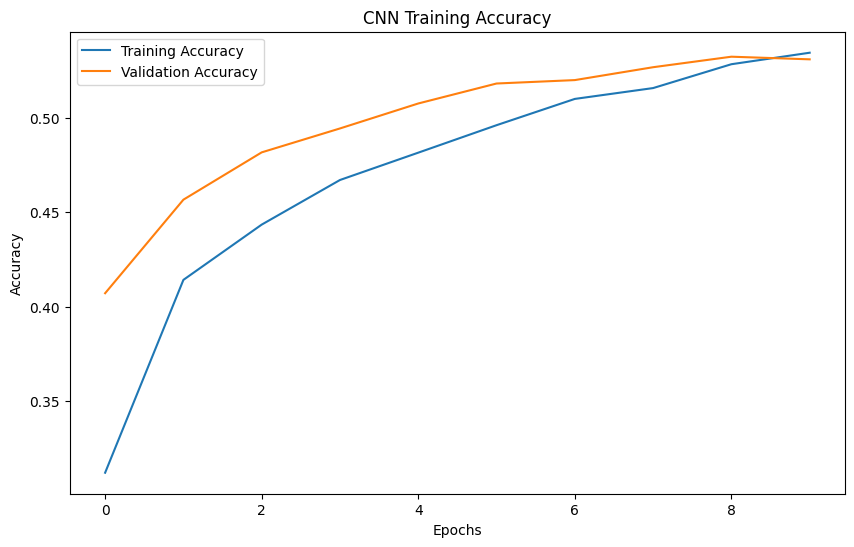

In [158]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# CNN Confusion Matrix


In [159]:
y_pred_cnn = cnn_model.predict(test_data)
y_pred_classes_cnn = np.argmax(y_pred_cnn, axis=1)
y_true_cnn = test_data.classes

cnn_conf_matrix = confusion_matrix(y_true_cnn, y_pred_classes_cnn)
print("CNN Confusion Matrix:")
print(cnn_conf_matrix)

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
CNN Confusion Matrix:
[[100   2  72 274 135 281  94]
 [ 13   0   8  25  14  42   9]
 [ 91   3  80 324 136 296  94]
 [175   6 137 527 235 527 167]
 [109   1  95 369 188 370 101]
 [116   2  78 364 199 373 115]
 [ 73   0  65 235 126 249  83]]


# Plot CNN Confusion Matrix


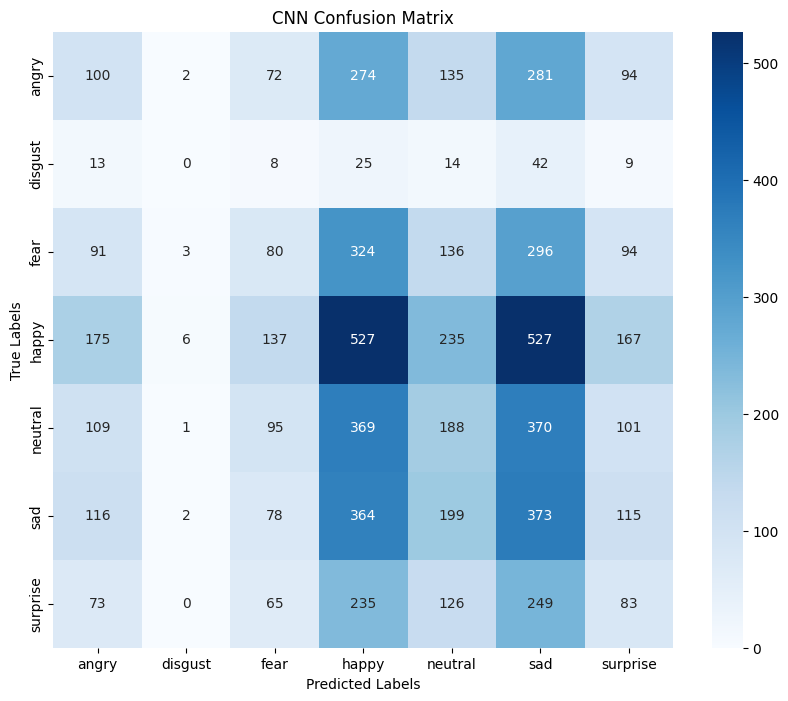

In [160]:
plt.figure(figsize=(10, 8))
sns.heatmap(cnn_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_data.class_indices.keys(), yticklabels=train_data.class_indices.keys())
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Save the CNN Model


In [161]:
cnn_model.save('emotion_recognition_model.h5')
plt.savefig('cnn_training_accuracy.png')  
plt.savefig('svm_confusion_matrix.png')
plt.savefig('cnn_confusion_matrix.png')

<Figure size 640x480 with 0 Axes>


# Export SVM and CNN Results and compare both models


In [162]:
print("Model Comparisons:")
print(f"SVM Accuracy: {accuracy_score(y_test, svm_predictions):.4f}")
print(f"CNN Accuracy: {cnn_accuracy:.4f}")

Model Comparisons:
SVM Accuracy: 0.0938
CNN Accuracy: 0.5311



# Save results in a file 


In [163]:
with open('model_results.txt', 'w') as f:
    f.write(f"SVM Accuracy: {accuracy_score(y_test, svm_predictions):.4f}\n")
    f.write(f"CNN Accuracy: {cnn_accuracy:.4f}\n")
    f.write("SVM Classification Report:\n")
    f.write(classification_report(y_test, svm_predictions))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

# Save results to text files


In [165]:
with open('svm_results.txt', 'w') as f:
    f.write(f"SVM Accuracy: {accuracy_score(y_test, svm_predictions):.4f}\n")
    f.write("SVM Classification Report:\n")
    f.write(classification_report(y_test, svm_predictions))
with open('cnn_results.txt', 'w') as f:
    f.write(f"CNN Accuracy: {cnn_accuracy:.4f}\n")
    f.write("CNN Confusion Matrix:\n")
    f.write(str(cnn_conf_matrix))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [166]:
cnn_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,517,143 (9.60 MB)

 Trainable params: 839,047 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,678,096 (6.40 MB)

# Defining CNN architecture model

In [167]:
from tensorflow.keras import Input
from tensorflow.keras.models import Model

inputs = Input(shape=(48, 48, 1))
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(len(train_data.class_indices), activation='softmax')(x)
cnn_model = Model(inputs=inputs, outputs=outputs)
cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 16928)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │     2,166,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,168,135 (8.27 MB)

 Trainable params: 2,168,135 (8.27 MB)

 Non-trainable params: 0 (0.00 B)

# Feature maps

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


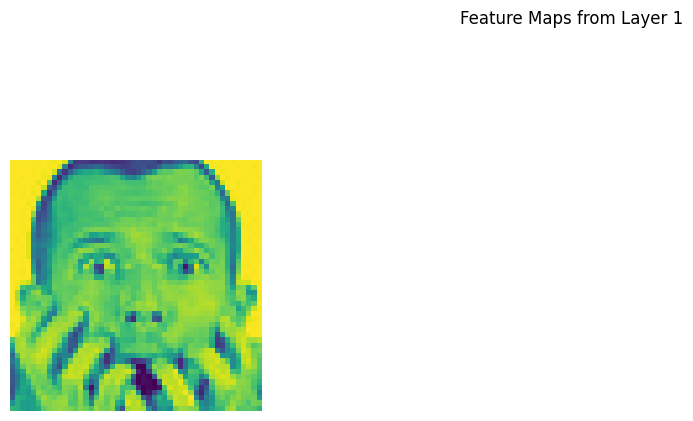

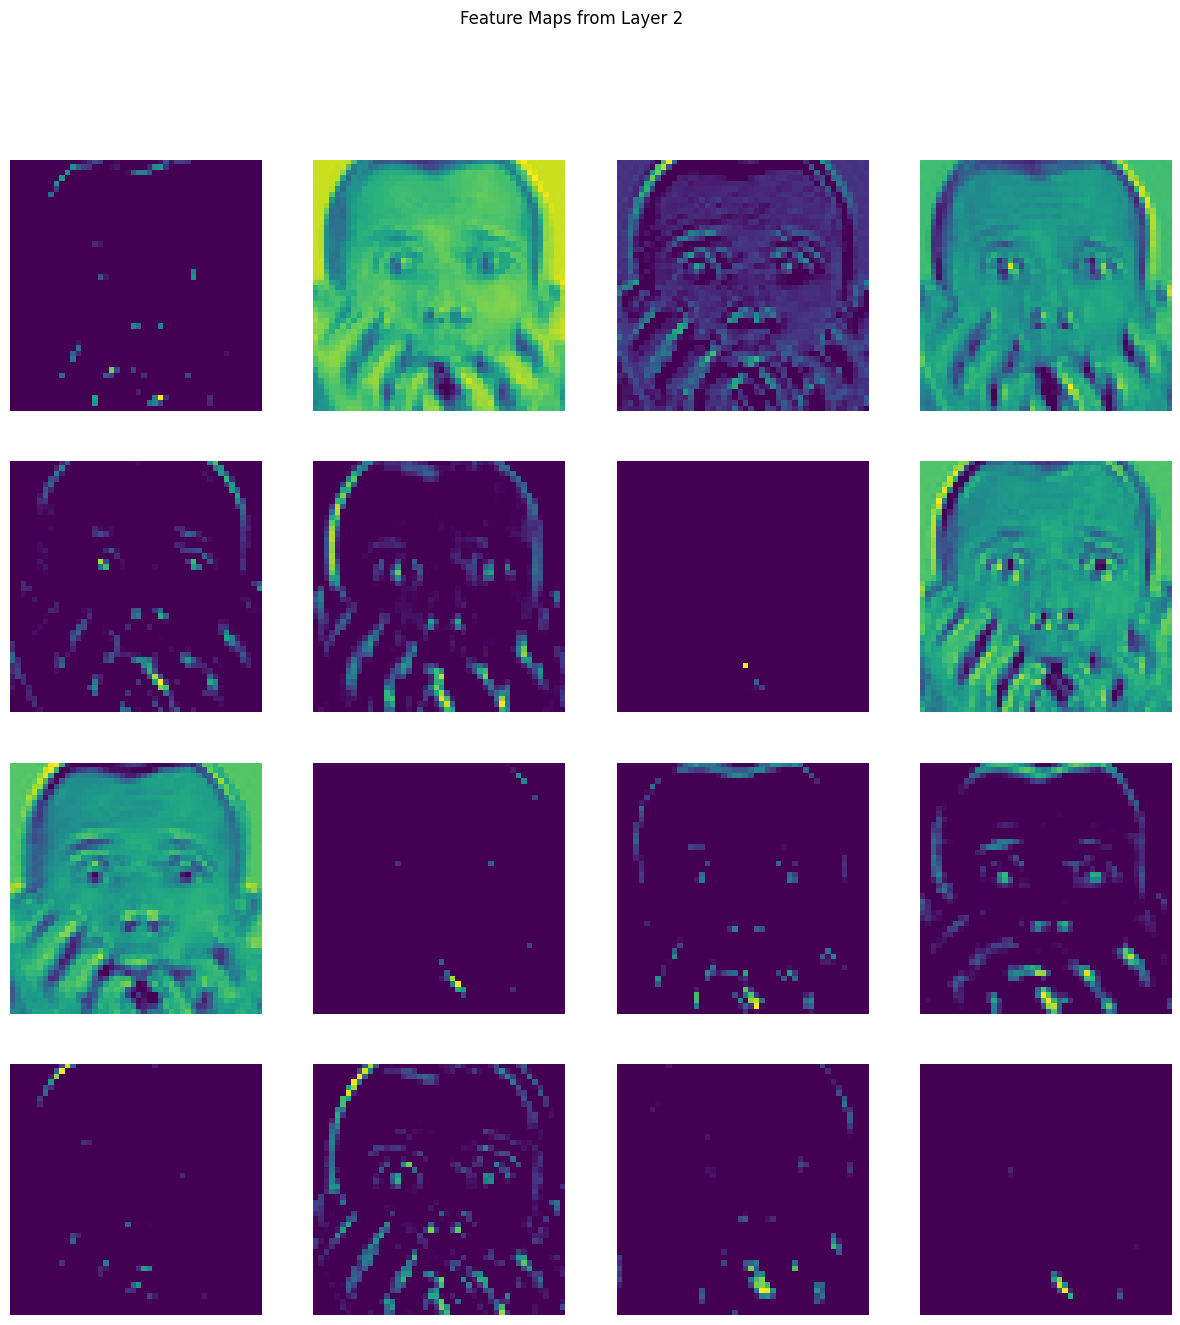

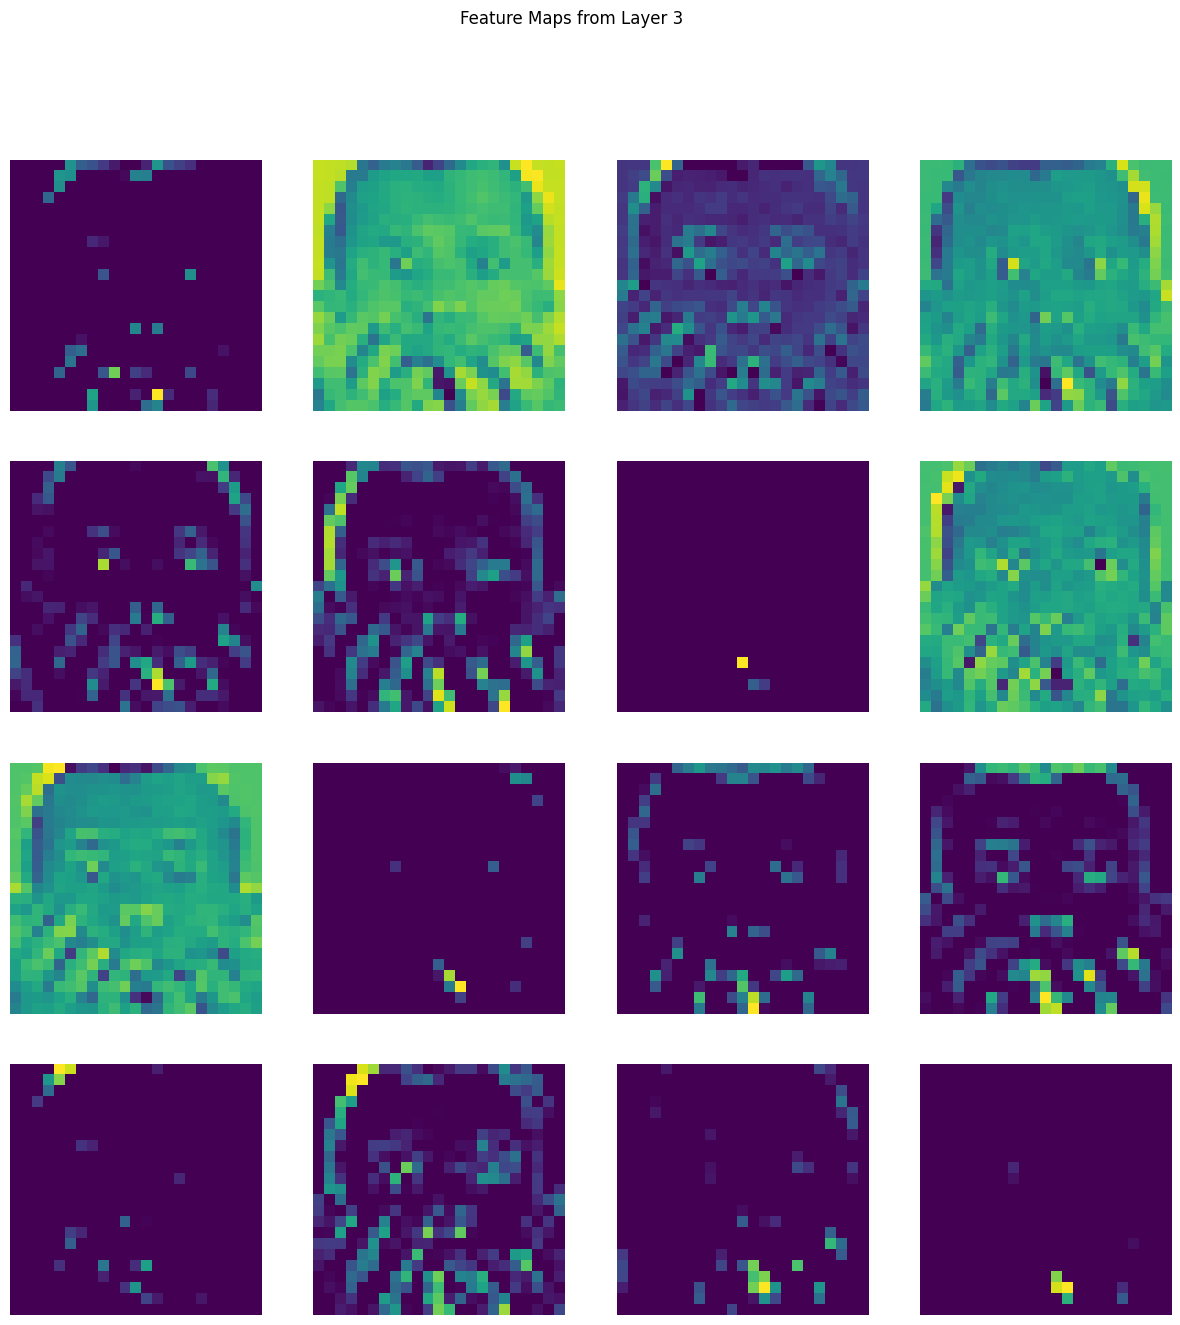

In [168]:
dummy_input = np.random.rand(1, 48, 48, 1)  #dummy input tensor
_ = cnn_model.predict(dummy_input)  # Call the model to initialize input/output tensors

# Extract feature maps from first 3 layers
layer_outputs = [layer.output for layer in cnn_model.layers[:3]]
feature_model = Model(inputs=cnn_model.input, outputs=layer_outputs)

# Test with a real image from the dataset
test_img = X_test[0]  
test_img = np.expand_dims(test_img, axis=0)  

# Get and plot feature maps 
feature_maps = feature_model.predict(test_img)
for layer_index, feature_map in enumerate(feature_maps):
    num_filters = feature_map.shape[-1]  # Number of filters in the layer
    plt.figure(figsize=(15, 15))
    for i in range(min(num_filters, 16)):  # Visualize up to 16 feature maps
        plt.subplot(4, 4, i + 1)
        plt.imshow(feature_map[0, :, :, i], cmap='viridis')
        plt.axis('off')
    plt.suptitle(f'Feature Maps from Layer {layer_index + 1}')
    plt.show()


# SVM feature importance and heat map

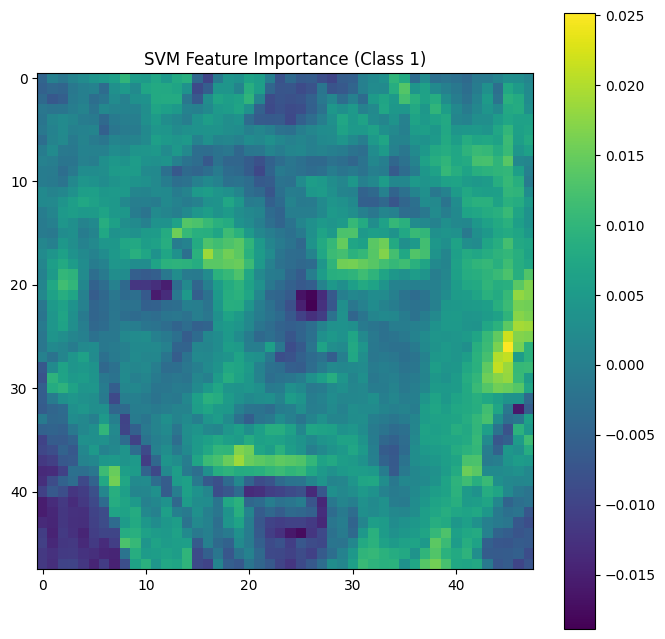

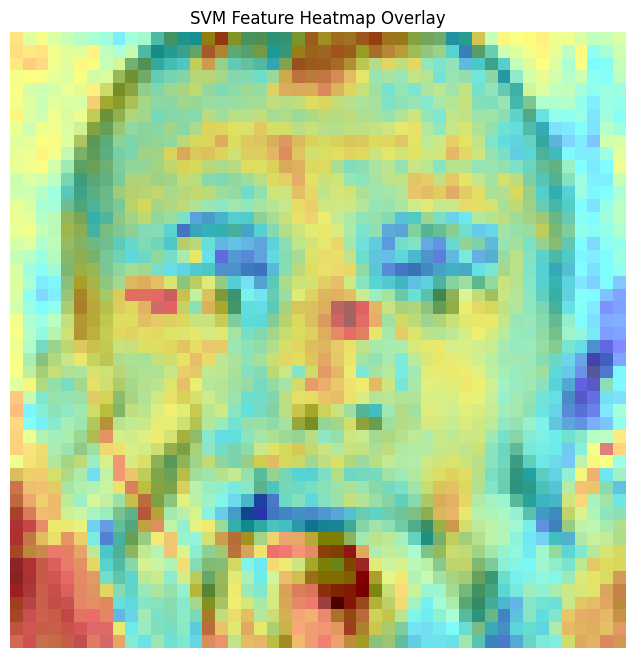

In [169]:
if svm_model.kernel == 'linear':
    coefficients = svm_model.coef_[0]
    reshaped_coefficients = coefficients.reshape(48, 48)
    plt.figure(figsize=(8, 8))
    plt.imshow(reshaped_coefficients, cmap='viridis')
    plt.title('SVM Feature Importance (Class 1)')
    plt.colorbar()
    plt.show()
else:
    print("Feature visualization is only supported for linear SVM models.")
import cv2

# Load a sample image from the dataset
sample_image = X_test[0].reshape(48, 48)  
coefficients_overlay = reshaped_coefficients

# Normalize the heatmap for overlay
normalized_heatmap = cv2.normalize(coefficients_overlay, None, 0, 255, cv2.NORM_MINMAX)
normalized_heatmap = normalized_heatmap.astype(np.uint8)

# Overlay the heatmap on the original image then show it
overlay = cv2.applyColorMap(normalized_heatmap, cv2.COLORMAP_JET)
overlay = cv2.addWeighted(overlay, 0.5, cv2.cvtColor((sample_image * 255).astype(np.uint8), cv2.COLOR_GRAY2BGR), 0.5, 0)
plt.figure(figsize=(8, 8))
plt.imshow(overlay)
plt.title("SVM Feature Heatmap Overlay")
plt.axis("off")
plt.show()


# Comparing SVM and CNN

In [171]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate metrics for SVM
svm_precision = precision_score(y_test, svm_predictions, average='weighted')
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')

# Calculate metrics for CNN
cnn_precision = precision_score(y_true_cnn, y_pred_classes_cnn, average='weighted')
cnn_recall = recall_score(y_true_cnn, y_pred_classes_cnn, average='weighted')
cnn_f1 = f1_score(y_true_cnn, y_pred_classes_cnn, average='weighted')

# Define metrics in the table
comparison_table = [
    ['Metric', 'SVM', 'CNN'],
    ['Accuracy', f"{accuracy_score(y_test, svm_predictions):.4f}", f"{cnn_accuracy:.4f}"],
    ['Precision', f"{svm_precision:.4f}", f"{cnn_precision:.4f}"],
    ['Recall', f"{svm_recall:.4f}", f"{cnn_recall:.4f}"],
    ['F1-Score', f"{svm_f1:.4f}", f"{cnn_f1:.4f}"]
]

# Print table using tabulate(it was installed in a previously deleted cell, may require reinstallation before running [CODE: pip install tabulate])
from tabulate import tabulate
print(tabulate(comparison_table, headers="firstrow", tablefmt="grid"))


+-----------+--------+--------+
| Metric    |    SVM |    CNN |
+===========+========+========+
| Accuracy  | 0.0938 | 0.5311 |
+-----------+--------+--------+
| Precision | 0.0291 | 0.1786 |
+-----------+--------+--------+
| Recall    | 0.0938 | 0.1882 |
+-----------+--------+--------+
| F1-Score  | 0.0437 | 0.1775 |
+-----------+--------+--------+


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [172]:
print("Model Comparison:")
print(f"SVM Accuracy: {accuracy_score(y_test, svm_predictions):.4f}")
print(f"CNN Accuracy: {cnn_accuracy:.4f}")


Model Comparison:
SVM Accuracy: 0.0938
CNN Accuracy: 0.5311


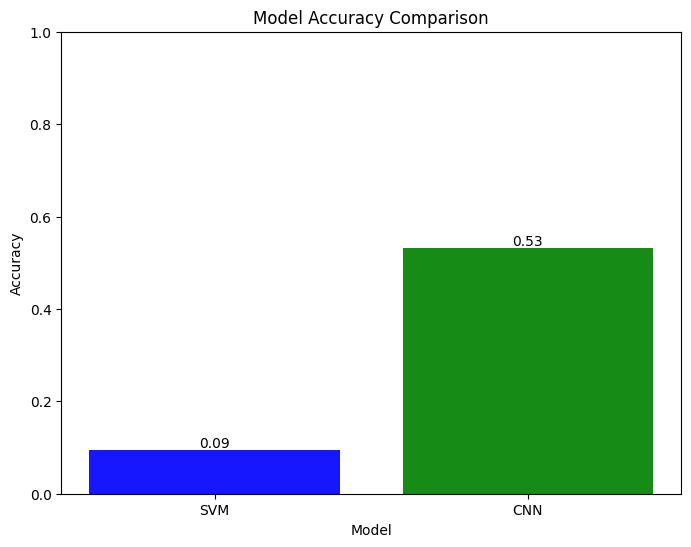

In [173]:
import matplotlib.pyplot as plt
svm_accuracy = accuracy_score(y_test, svm_predictions)  # SVM accuracy
cnn_accuracy = cnn_accuracy  # CNN accuracy (already calculated)
# Create labels and values
model_names = ['SVM', 'CNN']
accuracies = [svm_accuracy, cnn_accuracy]
# Plot bar chart
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['blue', 'green'], alpha=0.7)
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=0)
plt.bar_label(plt.bar(model_names, accuracies, color=['blue', 'green'], alpha=0.7), fmt='%.2f')
plt.show()